<h1>Hands-on project Units 1 and 2: Building an artificial neural network</h1>

Notebook realizado por:
- Jose Antonio Nicolás Navarro
- Arantzazu Ramos del Valle
- José Cerezo Egea


In [15]:
!pip install -U tensorflow-addons

In [16]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tqdm.keras import TqdmCallback

#from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
#import seaborn as sns
#import bokeh as bk

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


Definimos una función auxiliar para mostrar resultados tras cada entrenamiento.

In [ ]:
def print_resultados(results):
  human_error = 0
  
  train_error = round((1 - results.categorical_accuracy.values[-1:][0])*100, 1)
  dev_error = round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 1)
  print("Error (training): ", train_error, "%")
  print("Error (development test): ", dev_error, "%")
  print("Bias: ", train_error-human_error)
  print("Varianza: ", dev_error-train_error)
  print("Time: ", round((time.perf_counter() - start_time)),"seconds")

<h1>DATASETS</h1>

En primer lugar declaramos las rutas de los ficheros de datos a utilizar y los cargamos.

In [17]:
INPUT_FILE_NAME_1 = "/gdrive/My Drive/Colab Notebooks/PracticasRNA/FootballPlayerPreparedCleanAttributes.csv"
INPUT_FILE_NAME_2 = "/gdrive/My Drive/Colab Notebooks/PracticasRNA/FootballPlayerOneHotEncodedClasses.csv"

In [18]:
# Datos de entrada de la red
dataset_atributos = pd.read_csv(INPUT_FILE_NAME_1, sep=",")
# Datos de salida de la red
dataset_clases = pd.read_csv(INPUT_FILE_NAME_2, sep=",")

Particionamos los datos en 80% de train, 10% de desarrollo y 10% de test.

In [19]:
TRAIN_RATIO = 0.8

n_instances = dataset_atributos.shape[0]
n_train = int(n_instances*TRAIN_RATIO)
n_dev = int((n_instances - n_train)/2)

x_train = dataset_atributos.values[:n_train]
t_train = dataset_clases.values[:n_train]
x_dev = dataset_atributos.values[n_train:n_train + n_dev]
t_dev = dataset_clases.values[n_train:n_train + n_dev]
x_test = dataset_atributos.values[n_train + n_dev:]
t_test = dataset_clases.values[n_train + n_dev:]

INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]

NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES =      int(round(x_dev.shape[0]/1))

print("Número de casos de entrenamiento: ", int(round(x_train.shape[0]/1)))
print("Número de casos de desarrollo: ", int(round(x_dev.shape[0]/1)))
print("Número de casos de test: ", int(round(x_test.shape[0]/1)))

Número de casos de entrenamiento:  12897
Número de casos de desarrollo:  1612
Número de casos de test:  1613


<h1>PRIMER APROXIMAMIENTO</h1>

In [20]:
import random

random.seed(10)

In [22]:
# MODELO
n_neurons_per_hidden_layer = [75, 50, 25]
learning_rate = 0.01

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu",
            kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax",
          kernel_regularizer=keras.regularizers.l2(0.001)))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 10 #n_epochs = 500
batch_size = 128
start_time = time.perf_counter()

history1 = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 1, 
                    validation_data = (x_dev, t_dev))

history2 = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 1, 
                    validation_data = (x_dev, t_dev))

# RESULTADOS
#results = pd.DataFrame(history.history)

Epoch 1/10
101/101 [==============================] - 2s 10ms/step - loss: 1.4687 - categorical_accuracy: 0.3663 - val_loss: 1.4339 - val_categorical_accuracy: 0.4628
Epoch 2/10
101/101 [==============================] - 1s 7ms/step - loss: 1.3948 - categorical_accuracy: 0.4819 - val_loss: 1.3588 - val_categorical_accuracy: 0.4944
Epoch 3/10
101/101 [==============================] - 1s 6ms/step - loss: 1.3178 - categorical_accuracy: 0.5011 - val_loss: 1.2840 - val_categorical_accuracy: 0.5074
Epoch 4/10
101/101 [==============================] - 1s 5ms/step - loss: 1.2449 - categorical_accuracy: 0.5200 - val_loss: 1.2139 - val_categorical_accuracy: 0.5279
Epoch 5/10
101/101 [==============================] - 1s 7ms/step - loss: 1.1784 - categorical_accuracy: 0.5376 - val_loss: 1.1495 - val_categorical_accuracy: 0.5527
Epoch 6/10
101/101 [==============================] - 1s 7ms/step - loss: 1.1172 - categorical_accuracy: 0.5551 - val_loss: 1.0897 - val_categorical_accuracy: 0.5720
Epo

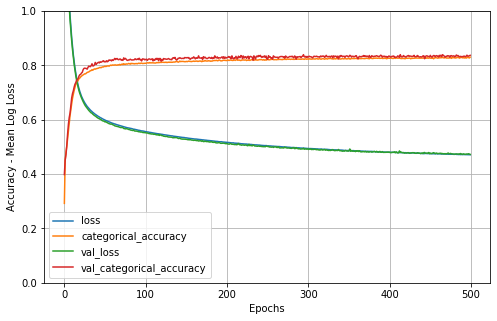

In [ ]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
import numpy as np
dev_correct_predictions = [True ,True , True ,False , True, False,  True ,False , True,  True  ,True , True,
  True  ,True ,False,  True , True, False  ,True , True,  True , True  ,True , True,
  True , True , True, False , True, False]
from collections import Counter
x = Counter (dev_correct_predictions)[0]
print(x)

7


In [ ]:
dev_predictions=model.predict(x_test).round(2)
dev_rounded_predictions=np.round(dev_predictions)
indices = np.argmax(dev_predictions,1)
for row, index in zip(dev_rounded_predictions, indices): row[index]=1
dev_correct_predictions = np.equal(np.argmax(dev_rounded_predictions,1),np.argmax(t_test,1))
print (dev_correct_predictions[:30])
from collections import Counter
Counter (dev_correct_predictions)

[ True  True  True False  True False  True False  True  True  True  True
  True  True False  True  True False  True  True  True  True  True  True
  True  True  True False  True False]


Counter({False: 297, True: 1316})

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
dev_predictions=model.predict(x_test).round(2)
dev_rounded_predictions=np.round(dev_predictions)

print('Confusion Matrix')
print(confusion_matrix(np.argmax(t_test, axis=1), np.argmax(dev_rounded_predictions, axis=1)))
print('Classification Report')
target_names = ['Poor', 'Interm', 'Good', 'Excel']
print(classification_report(t_test, dev_rounded_predictions, target_names=target_names))

Confusion Matrix
[[364  54   2   0]
 [ 56 303  56   0]
 [  2  55 337  35]
 [  6   0  38 305]]
Classification Report
              precision    recall  f1-score   support

        Poor       0.88      0.86      0.87       420
      Interm       0.74      0.73      0.73       415
        Good       0.78      0.79      0.78       429
       Excel       0.90      0.87      0.89       349

   micro avg       0.82      0.81      0.81      1613
   macro avg       0.82      0.81      0.82      1613
weighted avg       0.82      0.81      0.82      1613
 samples avg       0.81      0.81      0.81      1613



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Una vez tenemos todos los datos repartidos, comenzamos el proceso de construcción de redes neuronales profundas aprendido en la asignatura. Inicialmente comenzamos con una red sencilla para ver qué tal se comporta y a partir de ahí la mejoraremos.

In [ ]:
# MODELO
n_neurons_per_hidden_layer = [250, 75, 25]
learning_rate = 0.1

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 100
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  19.6 %
Error (development test):  17.7 %
Bias:  19.6
Varianza:  -1.9000000000000021
Time:  21 seconds


SEGUNDO --> More complexity (more neurons, more layers, etc.)

In [ ]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.1

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 100
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  18.0 %
Error (development test):  17.2 %
Bias:  18.0
Varianza:  -0.8000000000000007
Time:  39 seconds


TERCERO --> MAS EPOCAS

In [ ]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.1

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  10.6 %
Error (development test):  18.9 %
Bias:  10.6
Varianza:  8.299999999999999
Time:  216 seconds


CUARTO --> CAMBIAMOS OPTIMIZADOR (ADAM)

In [ ]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.1

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  52.3 %
Error (development test):  49.3 %
Bias:  52.3
Varianza:  -3.0
Time:  203 seconds


QUINTO --> CAMBIAMOS OPTIMIZADOR (NAG)

In [ ]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.1

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  0.0 %
Error (development test):  21.0 %
Bias:  0.0
Varianza:  21.0
Time:  202 seconds


SEXTO --> BAJAMOS LR (APRENDE MUY RÁPIDO CON LO DE ARRIBA)

In [ ]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.01

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  2.6 %
Error (development test):  20.0 %
Bias:  2.6
Varianza:  17.4
Time:  203 seconds


SEPTIMO --> METEMOS L2 (REGULARIZACION)

In [ ]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.01

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu",
            kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax",
          kernel_regularizer=keras.regularizers.l2(0.001)))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  13.6 %
Error (development test):  17.4 %
Bias:  13.6
Varianza:  3.799999999999999
Time:  203 seconds


2 PRUEBAS MÁS; SOLO CAMBIAMOS LR

In [ ]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.1

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu",
            kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax",
          kernel_regularizer=keras.regularizers.l2(0.001)))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  17.9 %
Error (development test):  19.5 %
Bias:  17.9
Varianza:  1.6000000000000014
Time:  203 seconds


In [ ]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.001

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu",
            kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax",
          kernel_regularizer=keras.regularizers.l2(0.001)))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  17.1 %
Error (development test):  17.1 %
Bias:  17.1
Varianza:  0.0
Time:  203 seconds


EN VEZ DE L2 METEMOS DROPOUT

In [ ]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.01

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  7.9 %
Error (development test):  18.3 %
Bias:  7.9
Varianza:  10.4
Time:  263 seconds


LE METEMOS UNA CAPA MAS

In [ ]:
n_neurons_per_hidden_layer = [500, 500, 250, 75, 25]
learning_rate = 0.01

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  4.2 %
Error (development test):  21.3 %
Bias:  4.2
Varianza:  17.1
Time:  503 seconds


CAMBIAR FUNCIONES DE ACTIVACIÓN (ELU)

In [ ]:
n_neurons_per_hidden_layer = [500, 500, 250, 75, 25]
learning_rate = 0.01

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="elu"))
  model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  18.5 %
Error (development test):  17.3 %
Bias:  18.5
Varianza:  -1.1999999999999993
Time:  563 seconds


CAMBIAR FUNCIONES DE ACTIVACIÓN (LeakyRELU)

In [ ]:
n_neurons_per_hidden_layer = [500, 500, 250, 75, 25]
learning_rate = 0.01

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="leaky_relu"))
  model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  11.0 %
Error (development test):  19.2 %
Bias:  11.0
Varianza:  8.2
Time:  563 seconds


PROBAR BACTH_NORMALIZATION

In [ ]:
n_neurons_per_hidden_layer = [500, 500, 250, 75, 25]
learning_rate = 0.01

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, kernel_initializer="he_normal", use_bias=False))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation("relu"))
  model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  5.5 %
Error (development test):  19.9 %
Bias:  5.5
Varianza:  14.399999999999999
Time:  683 seconds


MAS PROFUNDA (USAMOS LO DE ARRIBA) y más dropout

In [ ]:
n_neurons_per_hidden_layer = [100, 75, 25]
learning_rate = 0.1

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, kernel_initializer="he_normal", use_bias=False))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation("relu"))
  model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  14.0 %
Error (development test):  18.2 %
Bias:  14.0
Varianza:  4.199999999999999
Time:  102 seconds


PROBAR RMSProp

In [ ]:
n_neurons_per_hidden_layer = [500, 500, 250, 75, 25]
learning_rate = 0.01

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  3.2 %
Error (development test):  20.7 %
Bias:  3.2
Varianza:  17.5
Time:  563 seconds


In [ ]:
n_neurons_per_hidden_layer = [500, 500, 250, 75, 25]
learning_rate = 10e-4

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  0.4 %
Error (development test):  21.3 %
Bias:  0.4
Varianza:  20.900000000000002
Time:  503 seconds


In [ ]:
n_neurons_per_hidden_layer = [500, 500, 250, 75, 25]
learning_rate = 10e-4

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  1.2 %
Error (development test):  21.1 %
Bias:  1.2
Varianza:  19.900000000000002
Time:  503 seconds


In [ ]:
n_neurons_per_hidden_layer = [500, 500, 250, 75, 25]
learning_rate = 10e-3

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, kernel_initializer="he_normal", use_bias=False, kernel_regularizer=keras.regularizers.l2(0.001)))
  model.add(keras.layers.Activation("relu"))
  model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.001)))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  26.2 %
Error (development test):  21.2 %
Bias:  26.2
Varianza:  -5.0
Time:  563 seconds


In [ ]:
from keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor ="val_categorical_accuracy", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

n_neurons_per_hidden_layer = [500, 500, 250, 75, 25]
learning_rate = 10e-4

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 128
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],# earlystopping],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

KeyboardInterrupt: ignored

In [ ]:
n_neurons_per_hidden_layer = [60, 15, 15]
learning_rate = 10e-3

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, kernel_initializer="he_normal", use_bias=False, kernel_regularizer=keras.regularizers.l2(0.001)))
  model.add(keras.layers.Activation("relu"))
  model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.001)))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 512
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  28.4 %
Error (development test):  22.3 %
Bias:  28.4
Varianza:  -6.099999999999998
Time:  83 seconds


PRUEBA CON DISTINTOS % DE TRAIN; DEV Y TEST

In [ ]:
TRAIN_RATIO = 0.6

n_instances = dataset_atributos.shape[0]
n_train = int(n_instances*TRAIN_RATIO)
n_dev = int((n_instances - n_train)/1.5)

x_train = dataset_atributos.values[:n_train]
t_train = dataset_clases.values[:n_train]
x_dev = dataset_atributos.values[n_train:n_train + n_dev]
t_dev = dataset_clases.values[n_train:n_train + n_dev]
x_test = dataset_atributos.values[n_train + n_dev:]
t_test = dataset_clases.values[n_train + n_dev:]

INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]

NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES =      int(round(x_dev.shape[0]/1))

print("Número de casos de entrenamiento: ", int(round(x_train.shape[0]/1)))
print("Número de casos de desarrollo: ", int(round(x_dev.shape[0]/1)))
print("Número de casos de test: ", int(round(x_test.shape[0]/1)))

Número de casos de entrenamiento:  9673
Número de casos de desarrollo:  4299
Número de casos de test:  2150


In [ ]:
n_neurons_per_hidden_layer = [100, 75, 50, 25]
learning_rate = 10e-4

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 256
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  13.3 %
Error (development test):  19.4 %
Bias:  13.3
Varianza:  6.099999999999998
Time:  126 seconds


In [ ]:
n_neurons_per_hidden_layer = [125, 75, 25]
learning_rate = 10e-4

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 64
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  10.3 %
Error (development test):  21.2 %
Bias:  10.3
Varianza:  10.899999999999999
Time:  242 seconds


In [ ]:
n_neurons_per_hidden_layer = [25, 25, 12, 12]
learning_rate = 10e-4

model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
              metrics=["categorical_accuracy"])

# ENTRENAMIENTO
n_epochs = 500
batch_size = 64
start_time = time.perf_counter()

history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    callbacks=[TqdmCallback(verbose=0)],
                    validation_data = (x_dev, t_dev))

# RESULTADOS
results = pd.DataFrame(history.history)
print_resultados(results)

0epoch [00:00, ?epoch/s]

Error (training):  19.8 %
Error (development test):  21.2 %
Bias:  19.8
Varianza:  1.3999999999999986
Time:  263 seconds


In [ ]:
import openai

ModuleNotFoundError: ignored